In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')

In [ ]:
df.head(6)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   
5                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   
5  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   
5                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  
5              2015-07-03  

[6 rows x 32 columns]

### About Dataset

This dataset is about hotel booking records and this dataset is for performing EDA. There are 5 categorical and 27 numerical columns. Hotel booking dataset consist 4 years of record from 2014 to 2017.

Hotel booking dataset contains following colums:

- hotel
- is_canceled
- lead_time
- arrival_date_year
- arrival_date_month
- arrival_date_week_number
- arrival_date_day_of_month
- stays_in_weekend_nights
- stays_in_week_nights
- adults
- children
- babies
- meal
- country
- market_segment
- distribution_channel
- is_repeated_guest
- previous_cancellations
- previous_bookings_not_canceled
- reserved_room_type
- assigned_room_type
- booking_changes
- deposit_type
- agent
- company
- days_in_waiting_list
- customer_type
- adr
- required_car_parking_spaces
- total_of_special_requests
- reservation_status
- reservation_status_date

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Handling Missing Value

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: >

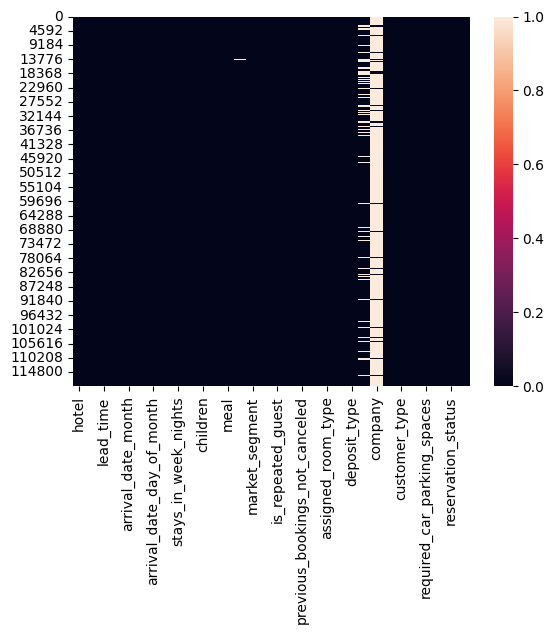

In [ ]:
sns.heatmap(df.isnull())

In dataset 4 columns having missing a values that are:

- children
- country
- agent
- company

#### **children**
In the children column only 4 missing values.

In the children column too less number of missing values so we replaced those missing values with column mode and changed it to datatype 'int'.

In [ ]:
df['children'] = df['children'].fillna(df['children'].mode()[0])

In [ ]:
df['children']=df['children'].astype(int)

#### **country**

In the country column, only 488 are missing values.

In the country column there are a manageable amount of missing values so we replace those missing values with column mode.

In [ ]:
df['country']=df['country'].fillna(df['country'].mode()[0])

#### **agent**
We replaced all the missing values of this column with its mean value and changed its datatype to 'int'

In [ ]:
df['agent'] = df['agent'].fillna(df['agent'].mean())
df['agent'] = df['agent'].astype(int)


#### **company**

In the company column, only 112593 are missing values.

In this column, almost 94% of the data are missing values because of that it is not possible to perform any operation on this column so we will drop this column.

In [ ]:
df.drop(columns=['company'],axis=1, inplace=True)

### Handling Duplicates

We handled duplicates by dropping them.

In [ ]:
df.duplicated().sum()

32020

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

### Handling Date and Time

Here we combined 3 columns and made new column 'date'. The column we combine that are arrival_date_year,arrival_date_month,arrival_date_day_of_month and after that we drop these three columns.

In [ ]:
month={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
df['arrival_date_month']=df['arrival_date_month'].map(month)

In [ ]:
df["date"] = df["arrival_date_day_of_month"].astype(str) + "-" + df["arrival_date_month"].astype(str) + "-" + df["arrival_date_year"].astype(str)

In [ ]:
df["date"] = pd.to_datetime(df["date"],  format='%d-%m-%Y')

In [ ]:
df.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],axis=1,inplace=True)

We convert 'reservation_status_date' column datatype to datetime.

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### Outliers Detection and Removal

<Axes: >

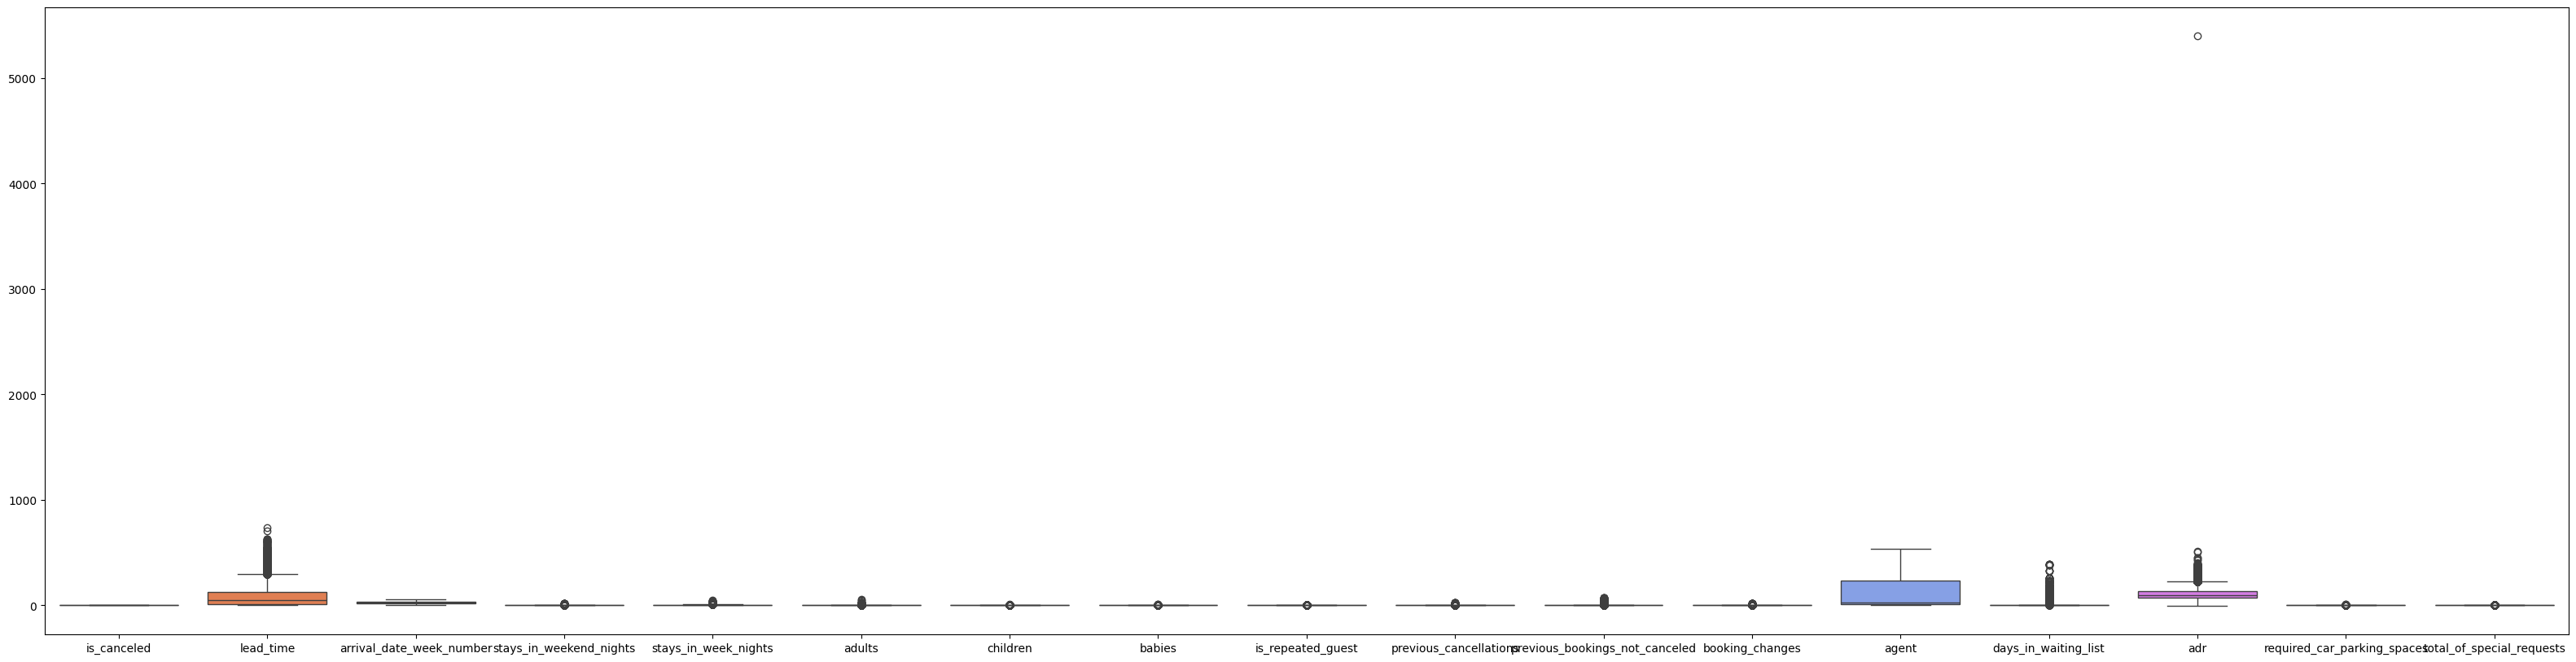

In [ ]:
fig = plt.subplots(figsize=(40,10))
sns.boxplot(df)

In [ ]:
def cap_outlier(value):
    if value < lower_limit:
        return lower_limit
    elif value > upper_limit:
        return upper_limit
    else:
        return value

In [ ]:
for i in df.columns:
  if df[i].dtype == 'int' or df[i].dtype == 'float':
    pcent25=df[i].quantile(0.25)
    pcent75=df[i].quantile(0.75)

    iqr=pcent75-pcent25

    upper_limit=pcent75+1.5*iqr
    lower_limit=pcent25-1.5*iqr

    df[i]=df[i].apply(cap_outlier)

<Axes: >

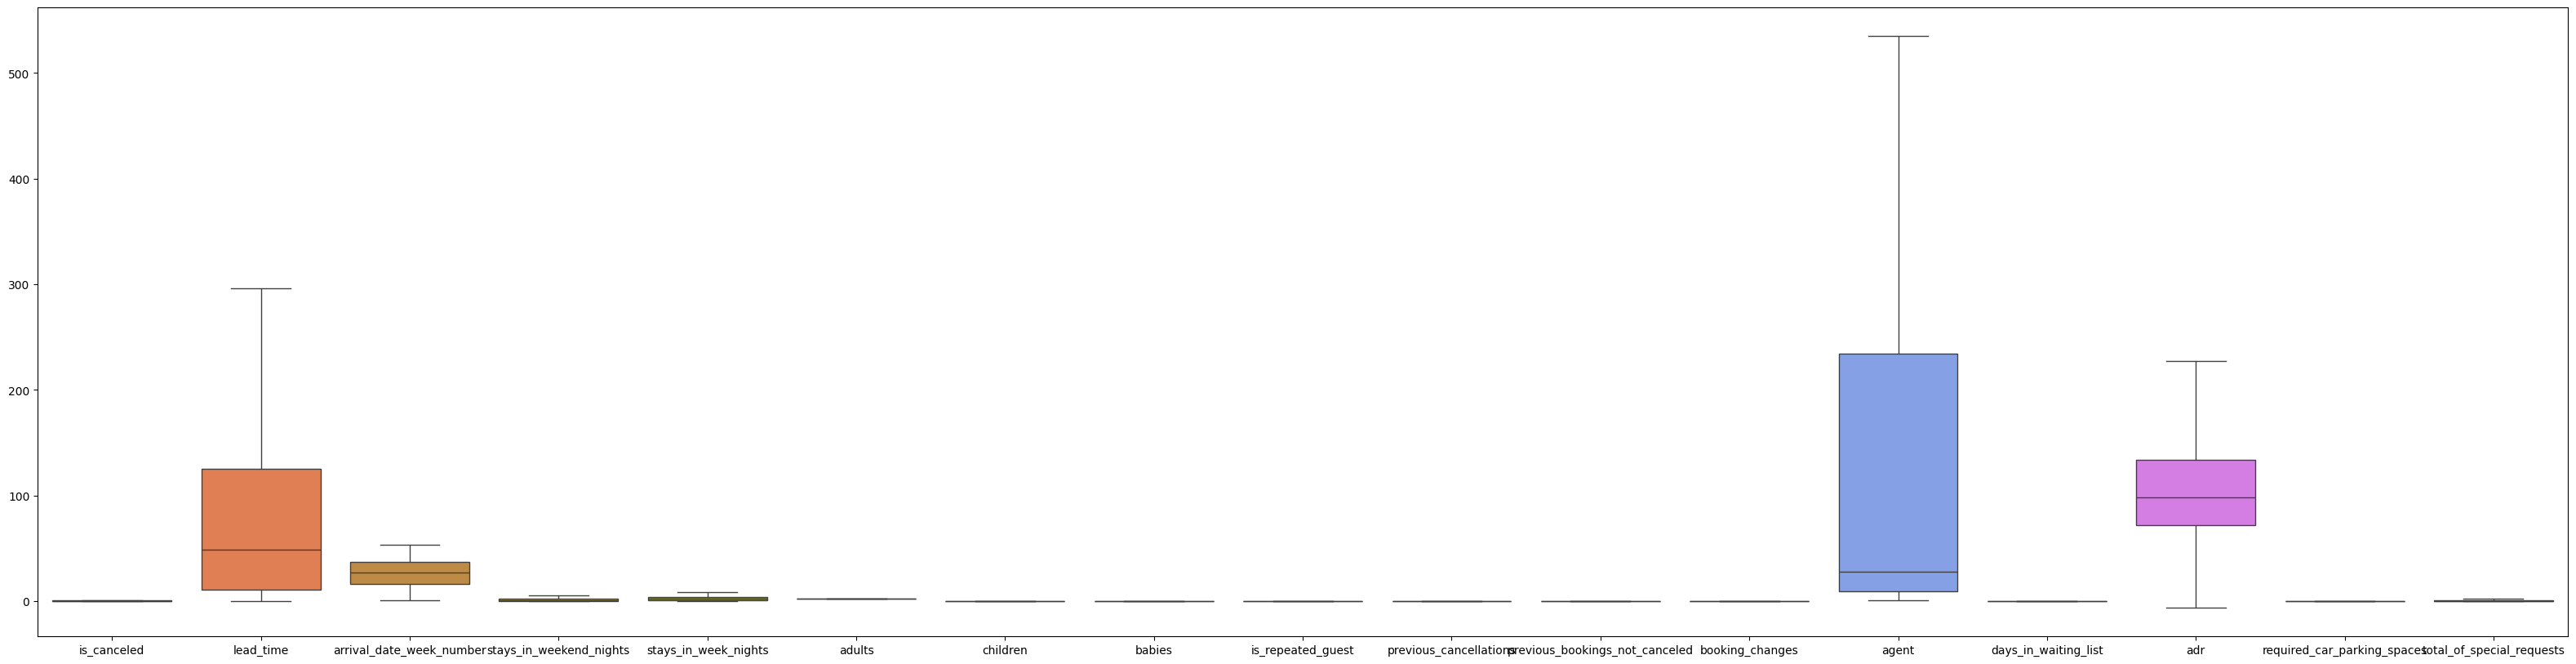

In [ ]:
fig = plt.subplots(figsize=(40,10))
sns.boxplot(df)

In [ ]:
df.describe()

is_canceled     lead_time  arrival_date_week_number  \
count  87370.000000  87370.000000              87370.000000   
mean       0.274969     78.383850                 26.839533   
std        0.446501     81.050557                 13.673204   
min        0.000000      0.000000                  1.000000   
25%        0.000000     11.000000                 16.000000   
50%        0.000000     49.000000                 27.000000   
75%        1.000000    125.000000                 37.000000   
max        1.000000    296.000000                 53.000000   

       stays_in_weekend_nights  stays_in_week_nights   adults  children  \
count             87370.000000          87370.000000  87370.0   87370.0   
mean                  0.999325              2.577481      2.0       0.0   
std                   0.994399              1.807474      0.0       0.0   
min                   0.000000              0.000000      2.0       0.0   
25%                   0.000000              1.000000      2.0       0.0   
50%                   1.000000              2.000000      2.0       0.0   
75%                   2.000000              4.000000      2.0       0.0   
max                   5.000000              8.500000      2.0       0.0   

        babies  is_repeated_guest  previous_cancellations  \
count  87370.0            87370.0                 87370.0   
mean       0.0                0.0                     0.0   
std        0.0                0.0                     0.0   
min        0.0                0.0                     0.0   
25%        0.0                0.0                     0.0   
50%        0.0                0.0                     0.0   
75%        0.0                0.0                     0.0   
max        0.0                0.0                     0.0   

       previous_bookings_not_canceled  booking_changes         agent  \
count                         87370.0          87370.0  87370.000000   
mean                              0.0              0.0     92.996269   
std                               0.0              0.0    105.034993   
min                               0.0              0.0      1.000000   
25%                               0.0              0.0      9.000000   
50%                               0.0              0.0     28.000000   
75%                               0.0              0.0    234.000000   
max                               0.0              0.0    535.000000   

       days_in_waiting_list           adr  required_car_parking_spaces  \
count               87370.0  87370.000000                      87370.0   
mean                    0.0    105.355488                          0.0   
std                     0.0     49.182928                          0.0   
min                     0.0     -6.380000                          0.0   
25%                     0.0     72.000000                          0.0   
50%                     0.0     98.100000                          0.0   
75%                     0.0    134.000000                          0.0   
max                     0.0    227.000000                          0.0   

       total_of_special_requests  
count                87370.00000  
mean                     0.67886  
std                      0.77656  
min                      0.00000  
25%                      0.00000  
50%                      0.00000  
75%                      1.00000  
max                      2.50000

Statistical Observations on Hotel Reservation Dataset:

1. **Cancellation Status (is_canceled)** : This binary column indicates whether a customer has canceled a reservation (0 for no cancellation, 1 for cancellation).

2. **Lead Time** : The lead time spans from 0 to 296 days, representing the duration between booking and the actual stay.

3. **Arrival Date Week Number** : The "arrival_date_week_number" specifies the week in which the customer arrives, considering a total of 52 weeks in a year.

4. **Stays in Weekend Nights** : "stays_in_weekend_nights" ranges from 0 to 5, indicating the number of nights customers stay over weekends.

5. **Stays in Week Nights** : "stays_in_week_nights" reflects a maximum of 8 nights during the week, with a minimum of 0.

6. **Adults** : The "adults" column consistently shows at least 2 adults per booking.

7. **Agent-Driven Reservations (agent)** : The "agent" feature provides data on the number of reservations made by agents, with values ranging from 1 to 535.

8. **ADR (Average Daily Rate)** : "adr" represents the price or bill for customers, ranging from a minimum of -6 to a maximum of 227.

9. **Special Requests** : The "total_of_special_requests" column records the number of special requests made by customers, ranging from 0 to 2.

10. Columns with Minimum and Maximum Values of 0:

- **children** : Indicates the number of children accompanying the customer.
- **babies** : Represents the number of babies accompanying the customer.
- **is_repeated_guest** : Reflects whether the customer is a repeat visitor to the hotel.
- **previous_cancellations** : Records the number of previous bookings canceled by the customer prior to the current booking.
- **previous_bookings_not_canceled** : Displays the number of previous bookings not canceled by the customer prior to the current booking.
- **booking_changes** : Captures the number of changes or amendments made to the booking since its entry.
- **days_in_waiting_list** : Represents the number of days the booking was in the waiting list before confirmation.
- **required_car_parking_spaces** : Indicates the number of car parking spaces required by the customer.

These observations provide a comprehensive overview of key features in our dataset, setting the stage for in-depth analysis and insights into customer behavior and preferences.


In [ ]:
str_columns = df.select_dtypes(include='object')
str_columns

hotel meal country market_segment distribution_channel  \
0       Resort Hotel   BB     PRT         Direct               Direct   
1       Resort Hotel   BB     PRT         Direct               Direct   
2       Resort Hotel   BB     GBR         Direct               Direct   
3       Resort Hotel   BB     GBR      Corporate            Corporate   
4       Resort Hotel   BB     GBR      Online TA                TA/TO   
...              ...  ...     ...            ...                  ...   
119385    City Hotel   BB     BEL  Offline TA/TO                TA/TO   
119386    City Hotel   BB     FRA      Online TA                TA/TO   
119387    City Hotel   BB     DEU      Online TA                TA/TO   
119388    City Hotel   BB     GBR      Online TA                TA/TO   
119389    City Hotel   HB     DEU      Online TA                TA/TO   

       reserved_room_type assigned_room_type deposit_type customer_type  \
0                       C                  C   No Deposit     Transient   
1                       C                  C   No Deposit     Transient   
2                       A                  C   No Deposit     Transient   
3                       A                  A   No Deposit     Transient   
4                       A                  A   No Deposit     Transient   
...                   ...                ...          ...           ...   
119385                  A                  A   No Deposit     Transient   
119386                  E                  E   No Deposit     Transient   
119387                  D                  D   No Deposit     Transient   
119388                  A                  A   No Deposit     Transient   
119389                  A                  A   No Deposit     Transient   

       reservation_status  
0               Check-Out  
1               Check-Out  
2               Check-Out  
3               Check-Out  
4               Check-Out  
...                   ...  
119385          Check-Out  
119386          Check-Out  
119387          Check-Out  
119388          Check-Out  
119389          Check-Out  

[87370 rows x 10 columns]

Insights from Categorical Data:

1. **Hotel Distinctions** : The dataset features two distinctive establishments: "City Hotel" and "Resort Hotel," each offering a unique ambiance and amenities tailored to different preferences.

2. **Diverse Meal Choices** : "City Hotel" caters to guests with BB, HB, SC, and FB meal plans.Meanwhile, "Resort Hotel" provides an array of meal options, including BB, HB, SC, FB, and a selection labeled as Undefined, ensuring a versatile dining experience.

3. **Geographic Origin (Country)** : The "country" column serves as a geographical lens, revealing the diverse nationalities of guests and adding a layer of cultural richness to the dataset.

4. **Market Segmentation** : "Market segment" classifications, such as "TA" (Travel Agents) and "TO" (Tour Operators), assist in understanding the booking dynamics and clientele composition.

5. **Booking Channel Dynamics** : Understanding the "channel distribution" unveils the various pathways customers use to secure reservations, with "TA" representing Travel Agents and "TO" indicating Tour Operators.

6. **Reserved Room Type** : "Reserved room type" sheds light on customers' initial room preferences during the reservation process.

7. **Assigned Room Type** : "Assigned room type" complements this by showcasing the room type actually allocated upon guests' arrival.

8. **Deposit Indicators** : The "deposit type" feature acts as a crucial indicator, revealing whether customers opted to make a deposit, with distinctions among three categories.

9. **Booking Nature** : "Customer type" delineates bookings into four distinct types, such as Contract, providing insights into the nature and purpose of reservations.

10. **Reservation Outcomes** : "Reservation status" encapsulates the final stages of bookings, categorizing them as Canceled (customer-initiated) or Check-Out, offering valuable insights into reservation outcomes.

These categorical features weave a rich tapestry of information, presenting an opportunity for in-depth analysis of customer behavior, preferences, and the diverse facets of the reservation process.

### Exploratory Data Analysis (EDA)

#### City Hotel

In [ ]:
df_ch = df[df['hotel']=='City Hotel']
df1=pd.DataFrame(df_ch)
df1.reset_index(drop=True, inplace=True)
df1.head(1)

hotel  is_canceled  lead_time  arrival_date_week_number  \
0  City Hotel            0        6.0                        27   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                      0.0                   2.0     2.0       0.0     0.0   

  meal  ... deposit_type agent days_in_waiting_list  customer_type  adr  \
0   HB  ...   No Deposit     6                  0.0      Transient  0.0   

   required_car_parking_spaces total_of_special_requests reservation_status  \
0                          0.0                       0.0          Check-Out   

   reservation_status_date       date  
0               2015-07-03 2015-07-01  

[1 rows x 29 columns]

In [ ]:
df_rh=df[df['hotel']=='Resort Hotel']
df2=pd.DataFrame(df_rh)
df2.reset_index(drop=True, inplace=True)
df2.head(1)

hotel  is_canceled  lead_time  arrival_date_week_number  \
0  Resort Hotel            0      296.0                        27   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                      0.0                   0.0     2.0       0.0     0.0   

  meal  ... deposit_type agent days_in_waiting_list  customer_type  adr  \
0   BB  ...   No Deposit    86                  0.0      Transient  0.0   

   required_car_parking_spaces total_of_special_requests reservation_status  \
0                          0.0                       0.0          Check-Out   

   reservation_status_date       date  
0               2015-07-01 2015-07-01  

[1 rows x 29 columns]

As we know in this dataset there are 2 different hotel data included one is 'City Hotel' and another one is 'Resort Hotel' so First we'll separate those two hotel datasets and make individual datasets for each hotel.

- City Hotel data shape is : (53426, 29)
- Resort Hotel data shape is : (33944, 29)

#### **What are the cancellation rates for both hotels?**

In [ ]:
df1['is_canceled'].value_counts()/len(df1)*100

0    69.960319
1    30.039681
Name: is_canceled, dtype: float64

In [ ]:
df2['is_canceled'].value_counts()/len(df2)*100

0    76.505421
1    23.494579
Name: is_canceled, dtype: float64

Text(0.5, 1.0, 'Cancel Rate in "Resort Hotel"')

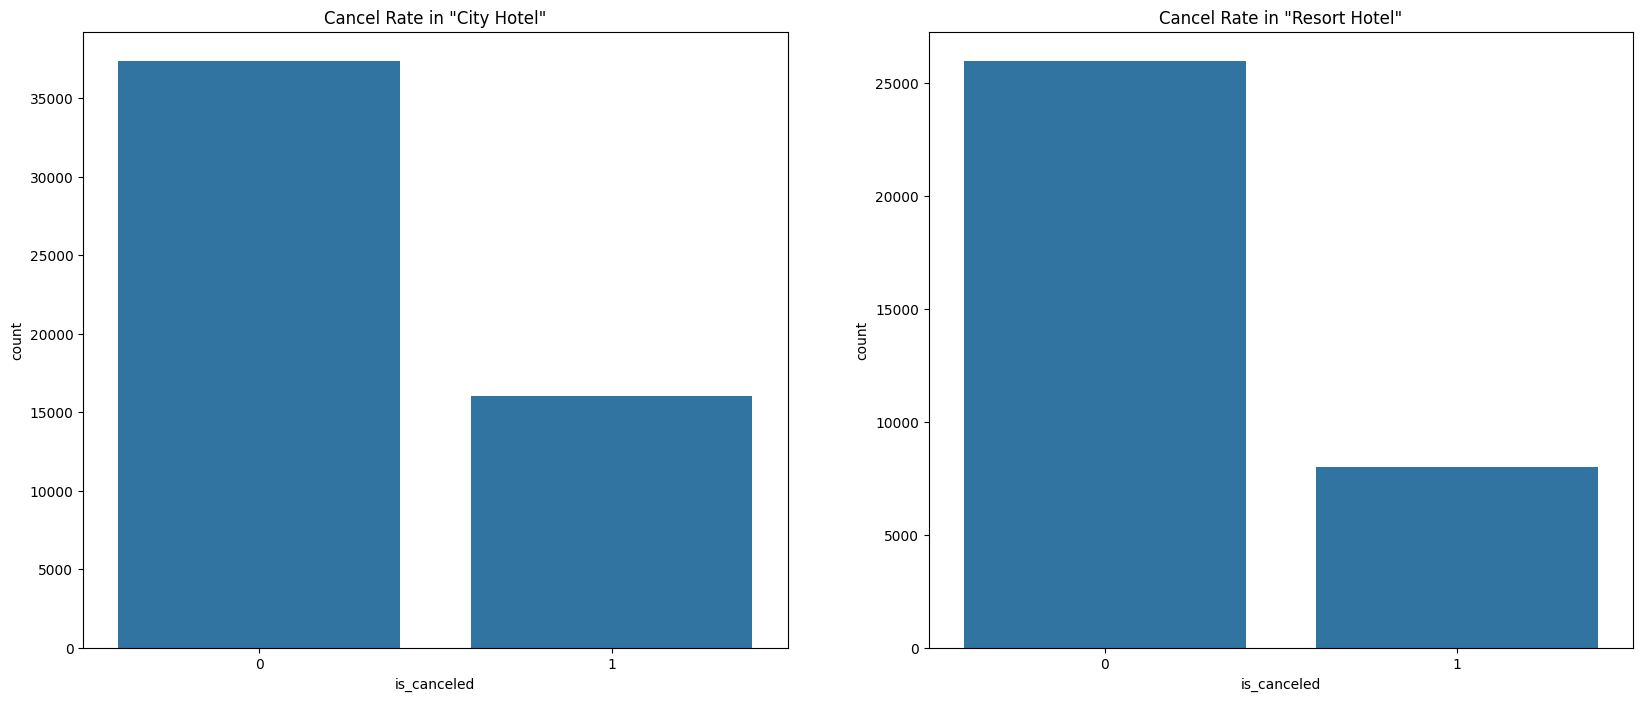

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x=df1['is_canceled'],ax=axes[0])
axes[0].set_title('Cancel Rate in "City Hotel"')
sns.countplot(x=df2['is_canceled'],ax=axes[1])
axes[1].set_title('Cancel Rate in "Resort Hotel"')

In evaluating the cancellation rates of our two featured hotels, "Resort Hotel" emerges as the more resilient choice with a cancellation rate of 23.49%. Conversely, "City Hotel" faces a comparatively higher cancellation rate, standing at 30.03%.

This observation highlights a noteworthy discrepancy, indicating that "City Hotel" experiences a cancellation rate 7.54% higher than its counterpart, "Resort Hotel." This insight underscores the importance of understanding cancellation metrics, providing valuable information for strategic decision-making and operational enhancements.



#### **Which five countries exhibit the highest cancellation rates?**

In [ ]:
customer_arrival1 = df1[ df1['is_canceled'] == 0 ]
customer_arrival2 = df2[ df2['is_canceled'] == 0 ]

In [ ]:
fig = sp.make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=customer_arrival1['country'], values=customer_arrival1['is_canceled'] + 1, title='City Hotel Arrival Rate'), 1, 1)
fig.add_trace(go.Pie(labels=customer_arrival2['country'], values=customer_arrival2['is_canceled'] + 1, title='Resort Hotel Arrival Rate'), 1, 2)
fig.add_trace(go.Pie(labels=df1['country'], values=df1['is_canceled'], title='Resort Hotel Cancelation Rate'), 2, 1)
fig.add_trace(go.Pie(labels=df2['country'], values=df2['is_canceled'], title='Resort Hotel Cancelation Rate'), 2, 2)

fig.update_layout(
    height=900,
    width=900
)

fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

Analyzing the cancellation rates for the top five countries in both "City Hotel" and "Resort Hotel" reveals distinct patterns:

City Hotel:
- PRT (Portugal): 30.5%
- FRA (France): 9.63%
- GBR (United Kingdom): 8.09%
- ESP (Spain): 6.97%
- ITA (Italy): 6.25%

Resort Hotel:
- PRT (Portugal): 61.9%
- ESP (Spain): 9.33%
- GBR (United Kingdom): 8.6%
- IRL (Ireland): 4.25%
- FRA (France): 2.34%

Notably, "Resort Hotel" grapples with higher cancellation rates, especially evident in Portugal (PRT) at a substantial 61.9%. This discrepancy prompts a focused examination of factors influencing cancellations, urging strategic interventions to minimize losses and enhance guest satisfaction.



#### **What is the average cost for a single-person room?**

In [ ]:
price1=df1[['reserved_room_type','assigned_room_type','children','adults','adr','is_canceled']]
price2=df2[['reserved_room_type','assigned_room_type','children','adults','adr','is_canceled']]
price1['room_price1']=df1["adr"] / (df1["adults"] + df1["children"])
price2['room_price2']=df2["adr"] / (df2["adults"] + df2["children"])

In [ ]:
price1['room_price1'].mean()

55.25122140905178

In [ ]:
price2['room_price2'].mean()

48.62723117487627

Average Price per Person for Hotel Reservations

After analyzing the dataset, the following average prices per person were observed:
- City Hotel :55.25
- Resort Hotel:48.62

The findings suggest that, on average, guests at City Hotels tend to pay a higher price per person for their reservations compared to guests at Resort Hotels.


Text(0.5, 1.0, 'Resort hotel room cost for per person')

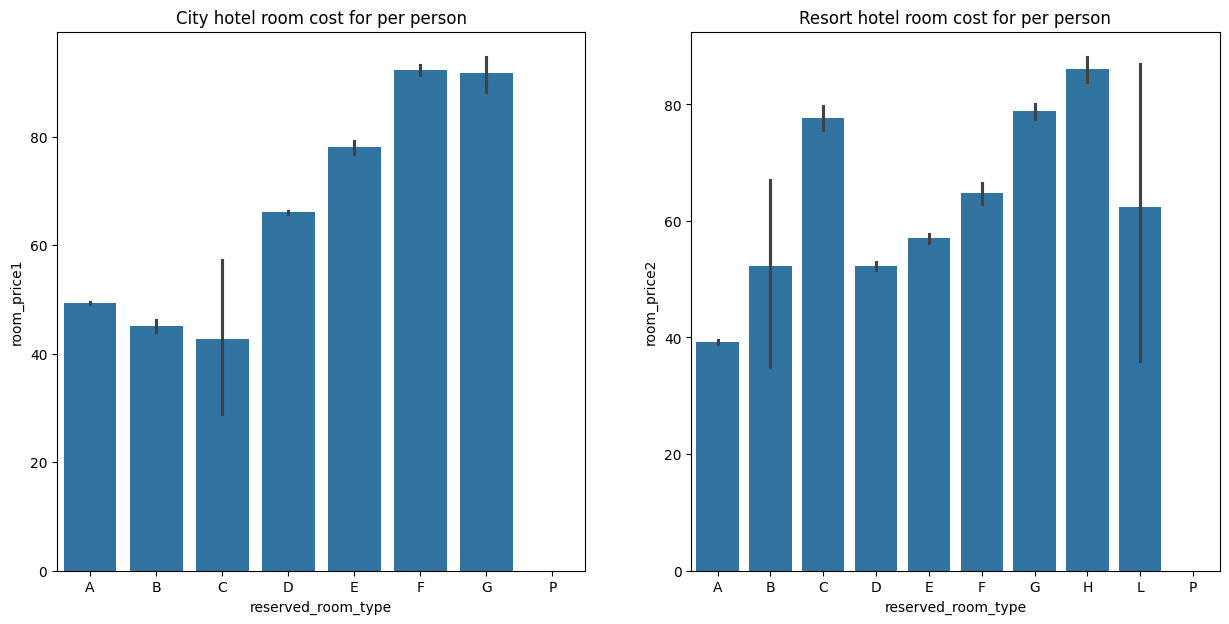

In [ ]:
srp1=price1[['reserved_room_type', 'room_price1']].sort_values('reserved_room_type')
srp2=price2[['reserved_room_type', 'room_price2']].sort_values('reserved_room_type')
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.barplot(x='reserved_room_type',y='room_price1',ax=axes[0],data=srp1)
axes[0].set_title('City hotel room cost for per person')
sns.barplot(x='reserved_room_type',y='room_price2',ax=axes[1],data=srp2)
axes[1].set_title('Resort hotel room cost for per person')

#### **What is the average room price for each accommodation in both hotels?**

In [ ]:
print('City hotel', df1.groupby('reserved_room_type')['adr'].mean())

City hotel reserved_room_type
A     98.799609
B     90.157651
C     85.482143
D    132.117640
E    156.098116
F    184.726574
G    183.392965
P      0.000000
Name: adr, dtype: float64


In [ ]:
print('Resort hotel', df2.groupby('reserved_room_type')['adr'].mean())

Resort hotel reserved_room_type
A     78.389507
B    104.666667
C    155.426737
D    104.436931
E    114.010142
F    129.493596
G    157.625124
H    172.218674
L    124.666667
P      0.000000
Name: adr, dtype: float64


In our analysis of average room prices for reservations, we observed distinctive pricing patterns for both 'City Hotel' and 'Resort Hotel' across various categories.This comprehensive breakdown allows for a clear comparison between the two hotel types, providing insights into the pricing variations across different categories.

The city hotel has a slightly higher pricing than the resort hotel.

#### **What are the arrival and cancellation statistics for reserved rooms in both hotels?**

Text(0.5, 1.0, 'Resort Hotel Arrival and Cancellation Rate by Reserved Room Type')

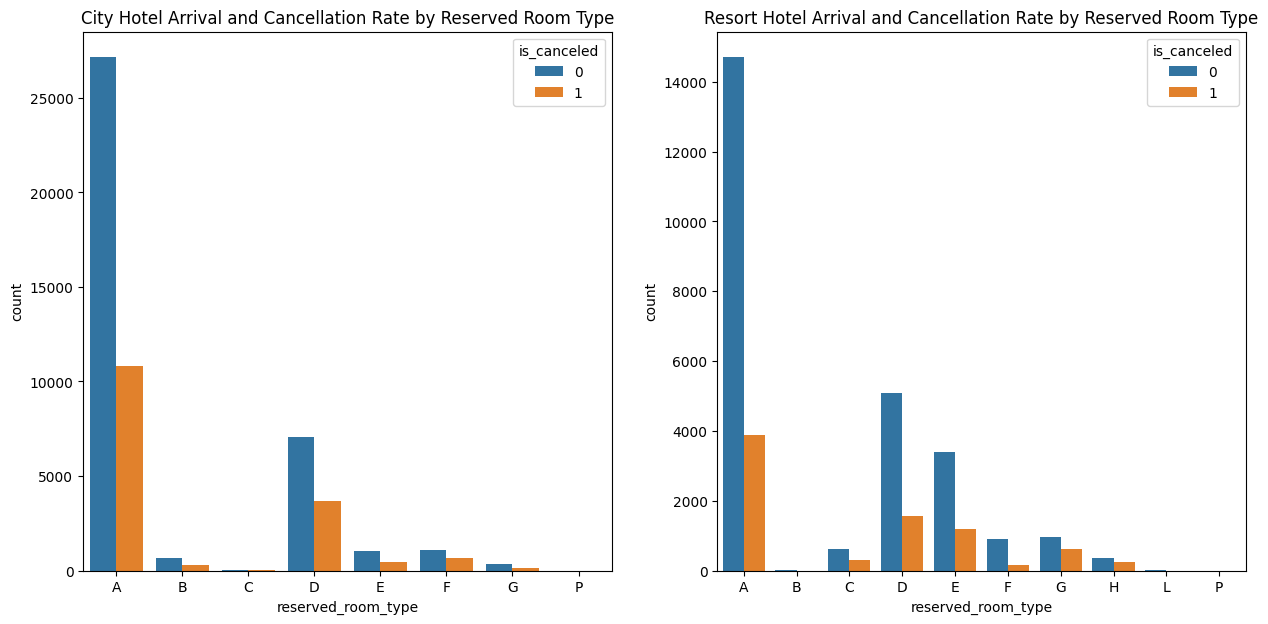

In [ ]:
sv1=price1[['reserved_room_type', 'is_canceled']].sort_values('reserved_room_type')
sv2=price2[['reserved_room_type', 'is_canceled']].sort_values('reserved_room_type')
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.countplot(x='reserved_room_type', hue='is_canceled' ,data=sv1, ax=axes[0])
axes[0].set_title('City Hotel Arrival and Cancellation Rate by Reserved Room Type')
sns.countplot(x='reserved_room_type', hue='is_canceled' ,data=sv2, ax=axes[1])
axes[1].set_title('Resort Hotel Arrival and Cancellation Rate by Reserved Room Type')

The cancellation rate for reserved room types is higher in the resort hotel compared to the city hotel.







#### **How many guests experienced a room change during the check-in process at the hotel?**

In [ ]:
price1['wrong_room1']=(price1['reserved_room_type']) == (price1['assigned_room_type'])
price2['wrong_room2']=(price2['reserved_room_type']) == (price2['assigned_room_type'])

In [ ]:
price1['wrong_room1'].mean()

0.8859731217010445

In [ ]:
price2['wrong_room2'].mean()

0.7936012255479613

In [ ]:
fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=price1['wrong_room1'], values=price1['is_canceled'], title='Guests at the City hotel experienced room changes at check-in.'), 1,1)
fig.add_trace(go.Pie(labels=price2['wrong_room2'], values=price2['is_canceled'], title='Guests at the Resort hotel experienced room changes at check-in.'), 1,2)

fig.update_layout(
    height=400,
    width=1000
)

fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

#### **Compare the market segment of Hotels.**

<Axes: xlabel='market_segment', ylabel='adr'>

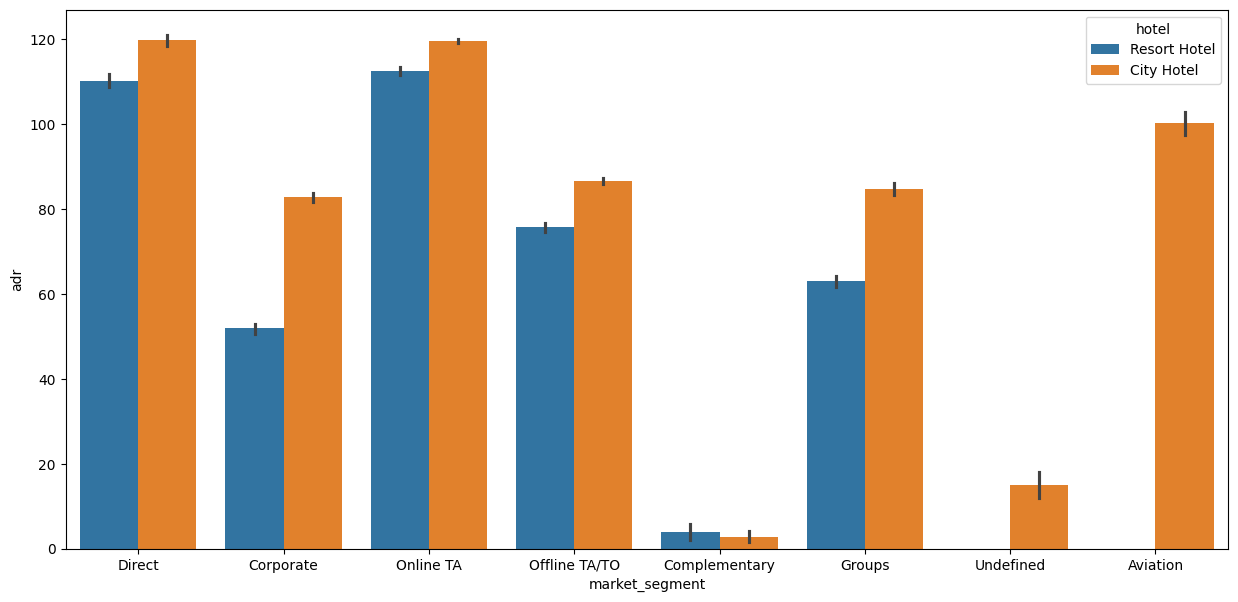

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=df)

#### **Compare the distribution of both hotels.**

<Axes: xlabel='distribution_channel', ylabel='adr'>

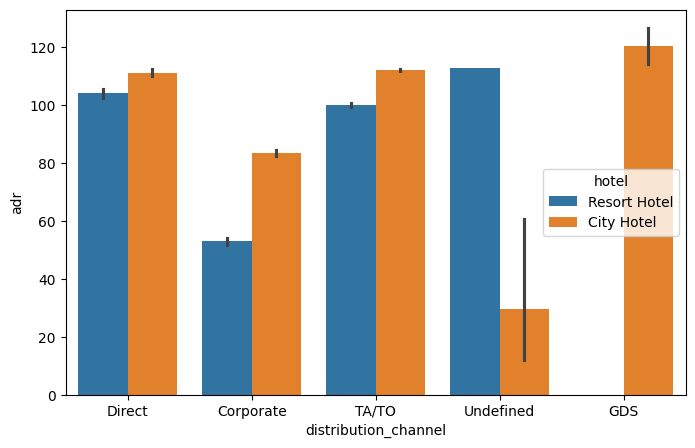

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='distribution_channel',y='adr',hue='hotel',data=df)

In [ ]:
fig = sp.make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df1['market_segment'], values=df1['is_canceled'], title='City Hotel Market Segment'), 1, 1)
fig.add_trace(go.Pie(labels=df2['market_segment'], values=df2['is_canceled'], title='Resort Hotel Market Segment'), 1, 2)
fig.add_trace(go.Pie(labels=df1['distribution_channel'], values=df1['is_canceled'], title='City Hotel Distribution channel'), 2, 1)
fig.add_trace(go.Pie(labels=df2['distribution_channel'], values=df2['is_canceled'], title='Resort Hotel Distribution channel'), 2, 2)


fig.update_layout(
    height=700,
    width=900
)

fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

### Final Conculsion

**Key Findings** :

- 'City Hotel' exhibits a cancellation rate 7.54% higher than that of 'Resort Hotel,' indicating a notable variance in guest retention.
- The average price per person at 'City Hotel' is marked at 55%, while 'Resort Hotel' maintains a lower figure of 48%, hinting at differing pricing strategies.
- Notably, 'City Hotel' presents a broader spectrum of room pricing options compared to 'Resort Hotel,' potentially influencing guest preferences and booking decisions.
- In terms of room assignment accuracy, 'City Hotel' boasts an impressive 88% accuracy rate, surpassing the 79% rate observed at 'Resort Hotel.'
- Enhancing 'Resort Hotel's' market segmentation and channel distribution strategies is imperative, as these factors could be contributing to its higher cancellation rates.

**Recommendations** :

1. Implement flexible cancellation policies.
2. Improve communication and transparency.
3. Enhance room assignment systems.
4. Offer incentives for non-cancellable bookings.
5. Monitor and respond to guest feedback.

### Observing Correlation

<Axes: >

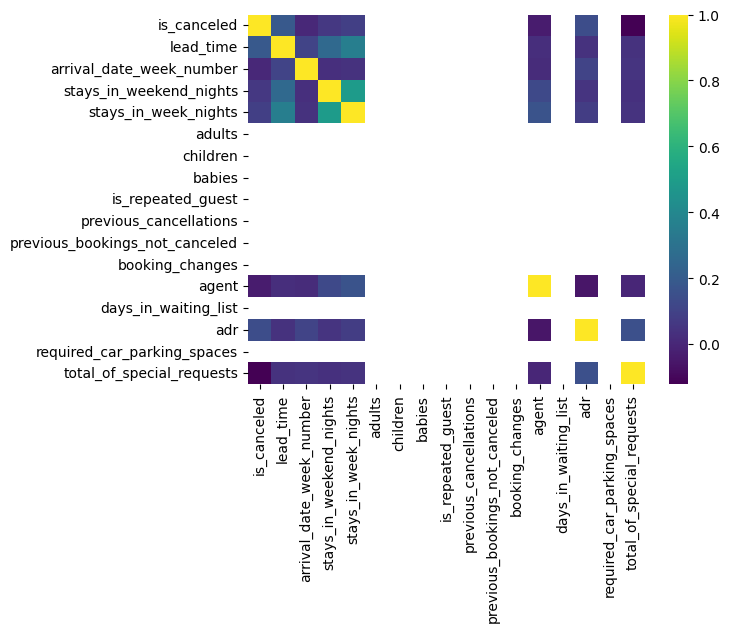

In [ ]:
sns.heatmap(df.corr(),cmap='viridis')

In [ ]:
df.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.188525
adr                               0.137244
stays_in_week_nights              0.086344
stays_in_weekend_nights           0.060147
arrival_date_week_number          0.001406
agent                            -0.038554
total_of_special_requests        -0.121920
adults                                 NaN
children                               NaN
babies                                 NaN
is_repeated_guest                      NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
booking_changes                        NaN
days_in_waiting_list                   NaN
required_car_parking_spaces            NaN
Name: is_canceled, dtype: float64

In [ ]:
df[df['assigned_room_type']=='L']

hotel  is_canceled  lead_time  arrival_date_week_number  \
14381  Resort Hotel            1        0.0                        29   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
14381                      0.0                   1.0     2.0       0.0   

       babies meal  ... deposit_type agent days_in_waiting_list  \
14381     0.0   BB  ...   No Deposit    86                  0.0   

       customer_type  adr  required_car_parking_spaces  \
14381      Transient  8.0                          0.0   

      total_of_special_requests reservation_status  reservation_status_date  \
14381                       0.0           Canceled               2015-07-17   

            date  
14381 2015-07-17  

[1 rows x 29 columns]

In [ ]:
dfN=df[['hotel','is_canceled','lead_time','stays_in_week_nights','stays_in_weekend_nights','arrival_date_week_number','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','adr','deposit_type','customer_type','reservation_status','adults','children','babies','reservation_status_date','date']]

In [ ]:
dfN.shape

(87370, 20)

In [ ]:
X=dfN.drop(columns=['is_canceled'])
y=dfN['is_canceled']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=52)

In [ ]:
df.iloc[2343:17]=='L'

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_week_number, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, date]
Index: []

[0 rows x 29 columns]

### Feature Engineering

In [ ]:
ct = ColumnTransformer([
    ('trf1',OrdinalEncoder(categories=[['City Hotel','Resort Hotel']]), ['hotel']),
    ('trf2',OneHotEncoder(drop='first',sparse=False),['market_segment', 'distribution_channel','reserved_room_type', 'assigned_room_type','deposit_type', 'customer_type','reservation_status']),
    ('trf3', TargetEncoder(cols=['country'],drop_invariant=False,handle_missing='return_nan', handle_unknown='value',hierarchy=None,min_samples_leaf=20,return_df=True, smoothing=10,verbose=0),['country'])
])

In [ ]:
X_train=ct.fit_transform(X_train,y_train)
X_test=ct.transform(X_test)

### Feature Scaling

In [ ]:
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
pt=PowerTransformer()

X_train=pt.fit_transform(X_train+000000.1)
X_test=pt.transform(X_test)

#### Utilizing GridSearchCV to evaluate various algorithms through testing models.



In [ ]:
lr=LogisticRegression()

param_grid = {
    'max_iter' : [1000],
    'penalty' : ['l2'],
    'multi_class' : ['auto']
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Hyperparameters:  {'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'l2'}
Best Accuracy:  1.0


In [ ]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print('Accuracy Score : ', accuracy_score(y_test,y_pred))
print('Cross Validation Score : ', np.mean(cross_val_score(lr,X_train,y_train,cv=10,scoring='f1')))

Accuracy Score :  0.7267940940826371
Cross Validation Score :  1.0


In [ ]:
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [ ]:
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

print('Accuracy Score : ', accuracy_score(y_test,y_pred))
print('Cross Validation Score : ', np.mean(cross_val_score(rfc,X_train,y_train,cv=10,scoring='f1')))

Accuracy Score :  1.0
Cross Validation Score :  1.0


In [ ]:
xgbc=XGBClassifier()

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None, 5, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'booster': ['gbtree', 'gblinear']
    }

grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Hyperparameters:  {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 50}
Best Accuracy:  1.0


In [ ]:
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)

In [ ]:
print('Accuracy Score : ', accuracy_score(y_test,y_pred))
print('Cross Validation Score : ', np.mean(cross_val_score(xgbc,X_train,y_train,cv=10,scoring='accuracy')))

Accuracy Score :  0.2725763992217008
Cross Validation Score :  1.0


RandomForestClassifier having highest accuracy of 100%